In [1]:
!pip install geopandas #instalação do "modulo" geografico da biblioteca Pandas

     |████████████████████████████████| 1.0 MB 8.1 MB/s 
     |████████████████████████████████| 16.7 MB 329 kB/s 
     |████████████████████████████████| 6.3 MB 38.0 MB/s 


In [2]:
#importação das bibliotecas
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from math import isnan, nan
import matplotlib.pyplot as plt

In [3]:
#o dataset possui varios arquivos com finalidades divergentes, aqui cada variavel corresponde ao entereço do dataset no repositorio do grupo
customer_file = "https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_customers_dataset.csv?raw=true" 
geolocation_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_geolocation_dataset.csv?raw=true'
order_item_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_order_items_dataset.csv?raw=true'
order_payment_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_order_payments_dataset.csv?raw=true'
order_review_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_order_reviews_dataset.csv?raw=true'
order_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_orders_dataset.csv?raw=true'
product_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_products_dataset.csv?raw=true'
sellers_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/olist_sellers_dataset.csv?raw=true'
translation_file = 'https://github.com/FelipeSantanaC/PISI3-2021.1/blob/main/data/product_category_name_translation.csv?raw=true'

In [4]:
#aqui importa o dataset e transforma em um DataFrame para as futuras analises
cust = pd.read_csv(customer_file)
geo = pd.read_csv(geolocation_file)
ordI = pd.read_csv(order_item_file)
ordP = pd.read_csv(order_payment_file)
ordR = pd.read_csv(order_review_file)
ord = pd.read_csv(order_file)
prod = pd.read_csv(product_file)
sell = pd.read_csv(sellers_file)
tran = pd.read_csv(translation_file)

---
# **Disponibilidade de Entregas nos Estados Brasileiros:**





In [5]:
# "função" padrão da biblioteca para os importar os mapas
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
#transformando em shapely point as coordenadas
geo['coordinates'] = list(zip(geo.geolocation_lng, geo.geolocation_lat))
geo['coordinates'] = geo['coordinates'].apply(Point)

In [7]:
#convertendo Data Frame em um Geo Data Frame
geoP = gpd.GeoDataFrame(geo, geometry='coordinates')
geoP.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,coordinates
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929 -23.54562)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482 -23.54608)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295 -23.54613)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63950 -23.54439)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64161 -23.54158)


In [8]:
#limitando as fronteiras brasileira 
geoP = geoP[geoP.geolocation_lat <= 5.271944]
geoP = geoP[geoP.geolocation_lat >= -33.751944]
geoP = geoP[geoP.geolocation_lng >= -73.990556]
geoP = geoP[geoP.geolocation_lng <= -34.792778]

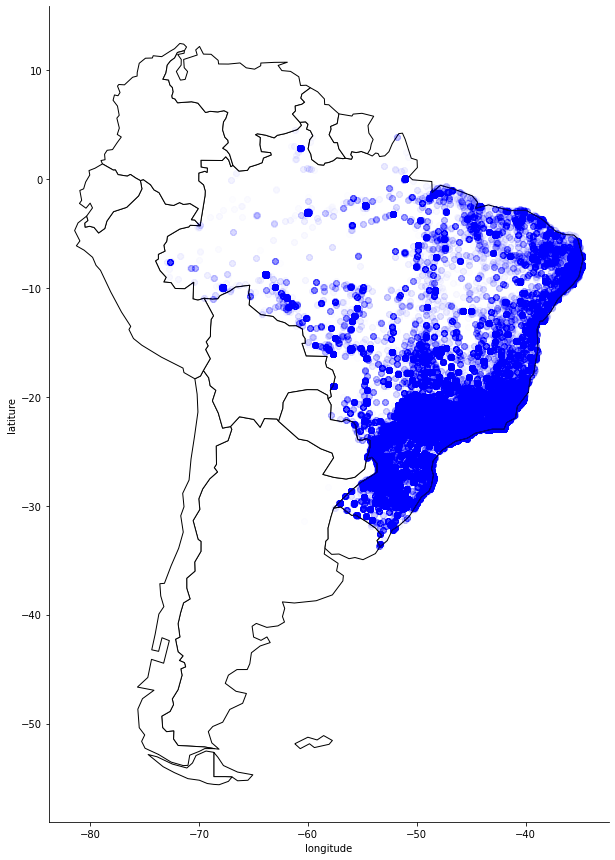

In [9]:
# "plotando" as cidades no mapa 
fig, gax = plt.subplots(figsize=(20,15))

#limitando a América do Sul
world.query("continent == 'South America'").plot(ax=gax, edgecolor='black',color='white')

# Este plota as cidades. É a mesma sintaxe, mas estamos plotando de um GeoDataFrame diferente.
gax.set_xlabel('longitude')
gax.set_ylabel('latiture')

geoP.plot(ax=gax, color='blue', alpha=0.009)

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

O mapa a cima é resultado da manipulação do pacote "geopandas" com a finalidade de mostrar a disponibilidade de entregas no Brasil.

Para a implementação do mapeamento foi necessario o uso do historico de pedidos que há no arquivo "olist_geolocation_dataset" sendo limitado apenas a entregas no Brasil, já que, o E-commerce permitiu e permite a exportação de produtos nacionais.

A análise, permite:

  * fornecer aos consumidores uma noção para identificar se é possivel receber os produtos em suas cidades ou regiões;
  * Aos empresarios fornece "relatórios" para novas estrategias serem implementadas em sua organização;
  * Da oportunidades e ideias a empresas de distribuição;
  * Observar a desigualdade no pais;

Tornando fundamental a implementar no artigo da equipe.  

---
